In [3]:
%run C:\Users\HSS\dd.py

In [9]:
movies = pd.read_csv('./tmdb-movie-metadata/tmdb_5000_movies.csv')
movies.shape

(4803, 20)

In [12]:
movies_df = movies[['id','title','genres','vote_average','vote_count','popularity','keywords','overview']]
movies_df.head()

,id,title,genres,vote_average,vote_count,popularity,keywords,overview
0,19995,Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",7.2,11800,150.437577,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",6.9,4500,139.082615,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",6.3,4466,107.376788,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",7.6,9106,112.312950,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",Following the death of District Attorney Harve...
4,49529,John Carter,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",6.1,2124,43.926995,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","John Carter is a war-weary, former military ca..."


### 하나의 작품에 한개의 장르가 적용되지 않는다.
- 장르칼럼이 dict의 list 형식으로 저장되어 있다.

In [15]:
movies_df.genres[:1].values

array(['[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'],
      dtype=object)

In [18]:
from ast import literal_eval

movies_df['genres'] = movies_df['genres'].apply(literal_eval)
movies_df['keywords'] = movies_df['keywords'].apply(literal_eval)

In [19]:
movies_df.head()

,id,title,genres,vote_average,vote_count,popularity,keywords,overview
0,19995,Avatar,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",7.2,11800,150.437577,"[{'id': 1463, 'name': 'culture clash'}, {'id':...","In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",6.9,4500,139.082615,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...","Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",6.3,4466,107.376788,"[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",7.6,9106,112.312950,"[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",Following the death of District Attorney Harve...
4,49529,John Carter,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",6.1,2124,43.926995,"[{'id': 818, 'name': 'based on novel'}, {'id':...","John Carter is a war-weary, former military ca..."


In [25]:
movies_df['genres'] = movies_df['genres'].apply(lambda x: [y['name'] for y in x])
movies_df['keywords'] = movies_df['keywords'].apply(lambda x: [y['name'] for y in x])

In [27]:
movies_df['genres_literal'] = movies_df['genres'].apply(lambda x: (' ').join(x))
movies_df.head()

,id,title,genres,vote_average,vote_count,popularity,keywords,overview,genres_literal
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]",7.2,11800,150.437577,"[culture clash, future, space war, space colon...","In the 22nd century, a paraplegic Marine is di...",Action Adventure Fantasy Science Fiction
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]",6.9,4500,139.082615,"[ocean, drug abuse, exotic island, east india ...","Captain Barbossa, long believed to be dead, ha...",Adventure Fantasy Action
2,206647,Spectre,"[Action, Adventure, Crime]",6.3,4466,107.376788,"[spy, based on novel, secret agent, sequel, mi...",A cryptic message from Bond’s past sends him o...,Action Adventure Crime
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]",7.6,9106,112.312950,"[dc comics, crime fighter, terrorist, secret i...",Following the death of District Attorney Harve...,Action Crime Drama Thriller
4,49529,John Carter,"[Action, Adventure, Science Fiction]",6.1,2124,43.926995,"[based on novel, mars, medallion, space travel...","John Carter is a war-weary, former military ca...",Action Adventure Science Fiction


### 장르를 count vectorize

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(min_df = 0, ngram_range = (1,2))
genre_mat = count_vect.fit_transform(movies_df['genres_literal'])
print(genre_mat.shape)

(4803, 276)


### 이를 cosine similarity로 측정

In [39]:
from sklearn.metrics.pairwise import cosine_similarity

genre_sim = cosine_similarity(genre_mat, genre_mat)
print(genre_sim)

[[1.         0.59628479 0.4472136  ... 0.         0.         0.        ]
 [0.59628479 1.         0.4        ... 0.         0.         0.        ]
 [0.4472136  0.4        1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


In [44]:
genre_sim_sorted_ind = genre_sim.argsort()[:,::-1]

In [46]:
def find_sim_movie(df,sorted_ind, title_name,top_n = 10):
    title_movie = df[df['title'] == title_name]

    title_index = title_movie.index.values
    similar_indexes = sorted_ind[title_index, :(top_n)]
    
    print(similar_indexes)
    similar_indexes = similar_indexes.reshape(-1)
    
    return df.iloc[similar_indexes]

In [48]:
similar_movies = find_sim_movie(movies_df, genre_sim_sorted_ind, 'The Godfather', 10)
similar_movies[['id','title','vote_average','vote_count']]

[[2731 1243 3636 1946 2640 4065 1847 4217  883 3866]]


,id,title,vote_average,vote_count
2731,240,The Godfather: Part II,8.3,3338
1243,203,Mean Streets,7.2,345
3636,36351,Light Sleeper,5.7,15
1946,11699,The Bad Lieutenant: Port of Call - New Orleans,6.0,326
2640,400,Things to Do in Denver When You're Dead,6.7,85
4065,364083,Mi America,0.0,0
1847,769,GoodFellas,8.2,3128
4217,9344,Kids,6.8,279
883,640,Catch Me If You Can,7.7,3795
3866,598,City of God,8.1,1814


### 장르는 비슷한 것 같지만, 평점과 평점 count 

In [49]:
similar_movies[['id','title','vote_average','vote_count']].sort_values('vote_average', ascending = False)

,id,title,vote_average,vote_count
2731,240,The Godfather: Part II,8.3,3338
1847,769,GoodFellas,8.2,3128
3866,598,City of God,8.1,1814
883,640,Catch Me If You Can,7.7,3795
1243,203,Mean Streets,7.2,345
4217,9344,Kids,6.8,279
2640,400,Things to Do in Denver When You're Dead,6.7,85
1946,11699,The Bad Lieutenant: Port of Call - New Orleans,6.0,326
3636,36351,Light Sleeper,5.7,15
4065,364083,Mi America,0.0,0


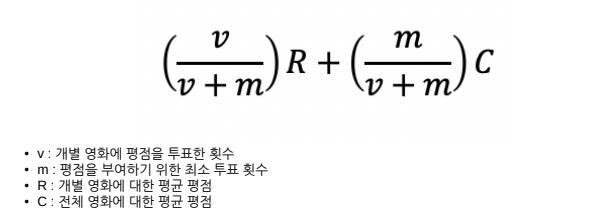

In [50]:
C = movies_df.vote_average.mean()
m = movies_df.vote_count.quantile(0.6)
print(round(C,2), round(m,2))

6.09 370.2


In [51]:
def weighted_average(record):
    v = record.vote_count
    R = record.vote_average
    
    return ((v/(v+m)*R) + (m/(v+m)*C))

In [52]:
movies_df['weighted_vote'] = movies_df.apply(weighted_average, axis = 1)
movies_df.head()

,id,title,genres,vote_average,vote_count,popularity,keywords,overview,genres_literal,weighted_vote
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]",7.2,11800,150.437577,"[culture clash, future, space war, space colon...","In the 22nd century, a paraplegic Marine is di...",Action Adventure Fantasy Science Fiction,7.166301
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]",6.9,4500,139.082615,"[ocean, drug abuse, exotic island, east india ...","Captain Barbossa, long believed to be dead, ha...",Adventure Fantasy Action,6.838594
2,206647,Spectre,"[Action, Adventure, Crime]",6.3,4466,107.376788,"[spy, based on novel, secret agent, sequel, mi...",A cryptic message from Bond’s past sends him o...,Action Adventure Crime,6.284091
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]",7.6,9106,112.312950,"[dc comics, crime fighter, terrorist, secret i...",Following the death of District Attorney Harve...,Action Crime Drama Thriller,7.541095
4,49529,John Carter,"[Action, Adventure, Science Fiction]",6.1,2124,43.926995,"[based on novel, mars, medallion, space travel...","John Carter is a war-weary, former military ca...",Action Adventure Science Fiction,6.098838


In [56]:
movies_df[['title','vote_average','vote_count','weighted_vote']].sort_values('weighted_vote', ascending = False).head(10)

,title,vote_average,vote_count,weighted_vote
1881,The Shawshank Redemption,8.5,8205,8.396052
3337,The Godfather,8.4,5893,8.263591
662,Fight Club,8.3,9413,8.216455
3232,Pulp Fiction,8.3,8428,8.207102
65,The Dark Knight,8.2,12002,8.136930
1818,Schindler's List,8.3,4329,8.126069
3865,Whiplash,8.3,4254,8.123248
809,Forrest Gump,8.2,7927,8.105954
2294,Spirited Away,8.3,3840,8.105867
2731,The Godfather: Part II,8.3,3338,8.079586


### 아이템 기반